**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN2b**<br>
**Name: "ExoticStarsResults_2.ipynb"**<br>

**Description:**<br> 
**1. Examples of sampling, displaying and saving data for regression purposes**

**Abbrevations**:<br>
**ES -> Exotic Star**<br>
**NS -> Neutron Star**<br>
**QS -> Quark Star**<br>

In [1]:
# Importing useful modules
import numpy as np 
import sympy as smp 
import matplotlib.pyplot as plt
from ExoticStarsDataHandling import *

## B. Exotic Stars Results: Sampling, shuffling and displaying data for regression purposes

### **1. Neutron Stars**

#### **1.1 Sampling and plotting energy density ($\epsilon$) and slope $(\frac{d\epsilon}{dP})$ data, along with the respective $\epsilon-P$, $\frac{d\epsilon}{dP} - P$ and $c_s-P$ curves**

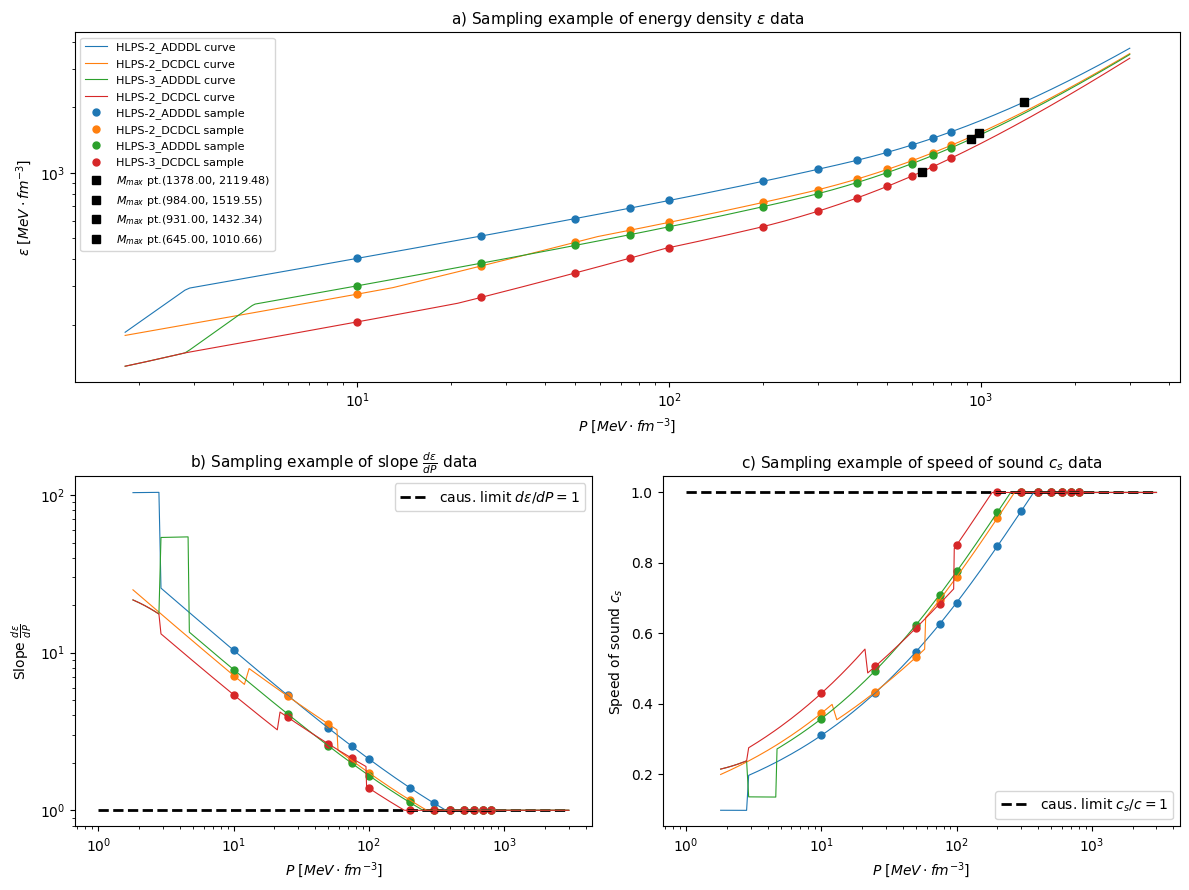

In [16]:
fig_sample_EOS_NS, axes_sample_EOS_NS = plt.subplots(figsize=(12,9))
axis_sample_energy_NS = plt.subplot2grid((2,2),(0,0),colspan=2)
axis_sample_slope_NS = plt.subplot2grid((2,2),(1,0))
axis_sample_cs_NS = plt.subplot2grid((2,2),(1,1))


# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,300,400,500,600,700,800]

# Plotting the EOS 2D curves
polyNSdata().plot_EOS_curve("HLPS-2_ADDDL_sol.csv",axis_sample_energy_NS,'#1f77b4',"polytropic",curve_label="HLPS-2_ADDDL curve",Pc_threshold=850)
polyNSdata().plot_EOS_curve("HLPS-2_DCDCL_sol.csv",axis_sample_energy_NS,'#ff7f0e',"polytropic",curve_label="HLPS-2_DCDCL curve",Pc_threshold=850)
polyNSdata().plot_EOS_curve("HLPS-3_ADDDL_sol.csv",axis_sample_energy_NS,'#2ca02c',"polytropic",curve_label="HLPS-3_ADDDL curve",Pc_threshold=850)
polyNSdata().plot_EOS_curve("HLPS-3_DCDCL_sol.csv",axis_sample_energy_NS,'#d62728',"polytropic",curve_label="HLPS-2_DCDCL curve",Pc_threshold=850)

# Sampling slope (dε/dP) energy density (ε) data without observational noise (1 sample per EOS curve)
slope_sample_HLPS2_ADDDL,energy_sample_HLPS2_ADDDL,Pc_Mmax_HLPS2_ADDDL,Ec_Mmax_HLPS2_ADDDL= polyNSdata().sample_EOS("HLPS-2_ADDDL_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS2_DCDCL,energy_sample_HLPS2_DCDCL,Pc_Mmax_HLPS2_DCDCL,Ec_Mmax_HLPS2_DCDCL= polyNSdata().sample_EOS("HLPS-2_DCDCL_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS3_ADDDL,energy_sample_HLPS3_ADDDL,Pc_Mmax_HLPS3_ADDDL,Ec_Mmax_HLPS3_ADDDL= polyNSdata().sample_EOS("HLPS-3_ADDDL_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_HLPS3_DCDCL,energy_sample_HLPS3_DCDCL,Pc_Mmax_HLPS3_DCDCL,Ec_Mmax_HLPS3_DCDCL= polyNSdata().sample_EOS("HLPS-3_DCDCL_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)

# Plotting the energy density ε sampling data
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4',label="HLPS-2_ADDDL sample")
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e',label="HLPS-2_DCDCL sample")
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c',label="HLPS-3_ADDDL sample")
axis_sample_energy_NS.plot(pressure_points,energy_sample_HLPS3_DCDCL,".",ms=10,color='#d62728',label="HLPS-3_DCDCL sample")

# Plotting the maximum mass points
axis_sample_energy_NS.plot(Pc_Mmax_HLPS2_ADDDL,Ec_Mmax_HLPS2_ADDDL,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_HLPS2_ADDDL:.2f}, {Ec_Mmax_HLPS2_ADDDL:.2f})")
axis_sample_energy_NS.plot(Pc_Mmax_HLPS2_DCDCL,Ec_Mmax_HLPS2_DCDCL,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_HLPS2_DCDCL:.2f}, {Ec_Mmax_HLPS2_DCDCL:.2f})")
axis_sample_energy_NS.plot(Pc_Mmax_HLPS3_ADDDL,Ec_Mmax_HLPS3_ADDDL,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_HLPS3_ADDDL:.2f}, {Ec_Mmax_HLPS3_ADDDL:.2f})")
axis_sample_energy_NS.plot(Pc_Mmax_HLPS3_DCDCL,Ec_Mmax_HLPS3_DCDCL,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_HLPS3_DCDCL:.2f}, {Ec_Mmax_HLPS3_DCDCL:.2f})")

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_energy_NS.set_title(r"a) Sampling example of energy density $\epsilon$ data", fontsize=11)
axis_sample_energy_NS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_energy_NS.set_ylabel(r"$\epsilon$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_energy_NS.set_xscale("log")
axis_sample_energy_NS.set_yscale("log")
axis_sample_energy_NS.legend(fontsize=8)

# Plotting the Slope (dE_dP) sampling data
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c')
axis_sample_slope_NS.plot(pressure_points,slope_sample_HLPS3_DCDCL,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=dε/dP=1
axis_sample_slope_NS.plot([1,3000],[1,1],"--",lw=2,color="black",label=r"caus. limit $d\epsilon/dP=1$")

# Plotting the respective Slope (dε_dP) vs Pressure 2D curves
polyNSdata().plot_dEdP_curve("HLPS-2_ADDDL_sol.csv",axis_sample_slope_NS,'#1f77b4',"polytropic",Pc_threshold=850)
polyNSdata().plot_dEdP_curve("HLPS-2_DCDCL_sol.csv",axis_sample_slope_NS,'#ff7f0e',"polytropic",Pc_threshold=850)
polyNSdata().plot_dEdP_curve("HLPS-3_ADDDL_sol.csv",axis_sample_slope_NS,'#2ca02c',"polytropic",Pc_threshold=850)
polyNSdata().plot_dEdP_curve("HLPS-3_DCDCL_sol.csv",axis_sample_slope_NS,'#d62728',"polytropic",Pc_threshold=850)

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_slope_NS.set_title(r"b) Sampling example of slope $\frac{d\epsilon}{dP}$ data", fontsize=11)
axis_sample_slope_NS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_slope_NS.set_ylabel(r"Slope $\frac{d\epsilon}{dP}$",fontsize=10)
axis_sample_slope_NS.set_xscale("log")
axis_sample_slope_NS.set_yscale("log")
axis_sample_slope_NS.legend(fontsize=10)

# Getting the Speed of Sound (c_s) sampling data
cs_sample_HLPS2_ADDDL = np.sqrt(1/np.array(slope_sample_HLPS2_ADDDL))
cs_sample_HLPS2_DCDCL = np.sqrt(1/np.array(slope_sample_HLPS2_DCDCL))
cs_sample_HLPS3_ADDDL = np.sqrt(1/np.array(slope_sample_HLPS3_ADDDL))
cs_sample_HLPS3_DCDCL = np.sqrt(1/np.array(slope_sample_HLPS3_DCDCL))

# Plotting the Speed of Sound (c_s) sampling data
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS2_ADDDL,".",ms=10,color='#1f77b4')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS2_DCDCL,".",ms=10,color='#ff7f0e')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS3_ADDDL,".",ms=10,color='#2ca02c')
axis_sample_cs_NS.plot(pressure_points,cs_sample_HLPS3_DCDCL,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve c_s=1
axis_sample_cs_NS.plot([1,3000],[1,1],"--",lw=2,color="black",label=r"caus. limit $c_s/c=1$")

# Plotting the respective Speed of Sound vs Pressure 2D curves
polyNSdata().plot_cs_curve("HLPS-2_ADDDL_sol.csv",axis_sample_cs_NS,'#1f77b4',"polytropic",Pc_threshold=850)
polyNSdata().plot_cs_curve("HLPS-2_DCDCL_sol.csv",axis_sample_cs_NS,'#ff7f0e',"polytropic",Pc_threshold=850)
polyNSdata().plot_cs_curve("HLPS-3_ADDDL_sol.csv",axis_sample_cs_NS,'#2ca02c',"polytropic",Pc_threshold=850)
polyNSdata().plot_cs_curve("HLPS-3_DCDCL_sol.csv",axis_sample_cs_NS,'#d62728',"polytropic",Pc_threshold=850)

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_cs_NS.set_title(r"c) Sampling example of speed of sound $c_s$ data", fontsize=11)
axis_sample_cs_NS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_cs_NS.set_ylabel(r"Speed of sound $c_s$",fontsize=10)
axis_sample_cs_NS.set_xscale("log")
axis_sample_cs_NS.legend(fontsize=10)


# Removing the frame and the ticks of the total figure
axes_sample_EOS_NS.spines['top'].set_visible(False)
axes_sample_EOS_NS.spines['right'].set_visible(False)
axes_sample_EOS_NS.spines['bottom'].set_visible(False)
axes_sample_EOS_NS.spines['left'].set_visible(False)
axes_sample_EOS_NS.set_xticks([])
axes_sample_EOS_NS.set_yticks([])


fig_sample_EOS_NS.tight_layout()
fig_sample_EOS_NS.savefig("sample_EOS_NS.pdf",dpi=300)

#### **1.2 Sampling and plotting  Mass and Radius data, along with their respective $M-R$ curves**

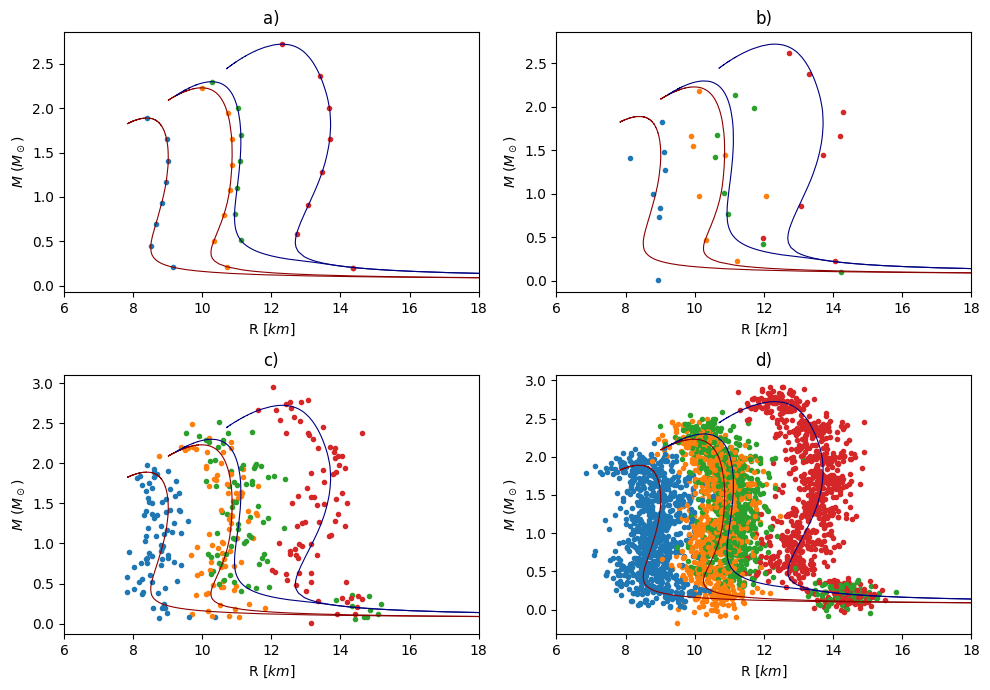

In [9]:
# Defining the figure and the axes
fig_sample_MR_NS,axes_sample_MR_NS = plt.subplots(2,2,figsize=(10,7))
points_mr = 8

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1,radius_sample_HLPS2_ADDDL_1 = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS2_DCDCL_1,radius_sample_HLPS2_DCDCL_1 = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_ADDDL_1,radius_sample_HLPS3_ADDDL_1 = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_DCDCL_1,radius_sample_HLPS3_DCDCL_1 = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_ADDDL_1,mass_sample_HLPS2_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_DCDCL_1,mass_sample_HLPS2_DCDCL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_ADDDL_1,mass_sample_HLPS3_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_DCDCL_1,mass_sample_HLPS3_DCDCL_1,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_NS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,0].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1n,radius_sample_HLPS2_ADDDL_1n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS2_DCDCL_1n,radius_sample_HLPS2_DCDCL_1n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_ADDDL_1n,radius_sample_HLPS3_ADDDL_1n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_DCDCL_1n,radius_sample_HLPS3_DCDCL_1n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_ADDDL_1n,mass_sample_HLPS2_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_DCDCL_1n,mass_sample_HLPS2_DCDCL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_ADDDL_1n,mass_sample_HLPS3_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_DCDCL_1n,mass_sample_HLPS3_DCDCL_1n,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_NS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,1].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_HLPS2_ADDDL_10n,radius_sample_HLPS2_ADDDL_10n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_10n,radius_sample_HLPS2_DCDCL_10n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_10n,radius_sample_HLPS3_ADDDL_10n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_10n,radius_sample_HLPS3_DCDCL_10n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_ADDDL_10n,mass_sample_HLPS2_ADDDL_10n,".",color='#1f77b4')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_DCDCL_10n,mass_sample_HLPS2_DCDCL_10n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_ADDDL_10n,mass_sample_HLPS3_ADDDL_10n,".",color='#2ca02c')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_DCDCL_10n,mass_sample_HLPS3_DCDCL_10n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_NS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,0].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_HLPS2_ADDDL_100n,radius_sample_HLPS2_ADDDL_100n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_100n,radius_sample_HLPS2_DCDCL_100n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_100n,radius_sample_HLPS3_ADDDL_100n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_100n,radius_sample_HLPS3_DCDCL_100n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_ADDDL_100n,mass_sample_HLPS2_ADDDL_100n,".",color='#1f77b4')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_DCDCL_100n,mass_sample_HLPS2_DCDCL_100n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_ADDDL_100n,mass_sample_HLPS3_ADDDL_100n,".",color='#2ca02c')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_DCDCL_100n,mass_sample_HLPS3_DCDCL_100n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_NS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,1].set_xbound([6,18])

fig_sample_MR_NS.tight_layout()
fig_sample_MR_NS.savefig("sample_MR_8pts_NS.pdf",dpi=300)

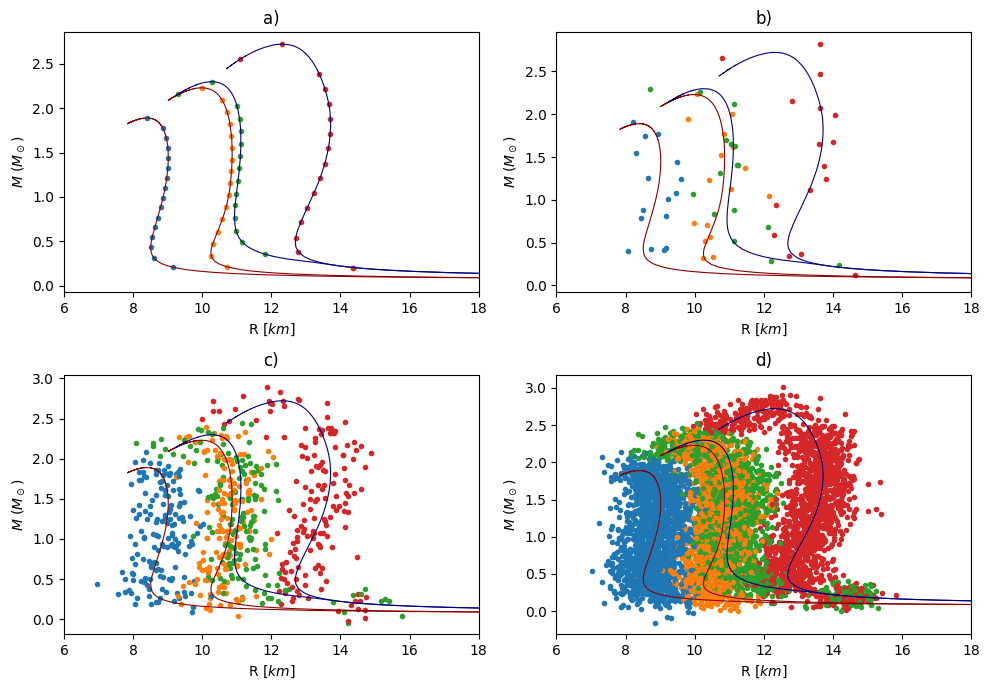

In [10]:
# Defining the figure and the axes
fig_sample_MR_NS,axes_sample_MR_NS = plt.subplots(2,2,figsize=(10,7))
points_mr = 16

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1,radius_sample_HLPS2_ADDDL_1 = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS2_DCDCL_1,radius_sample_HLPS2_DCDCL_1 = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_ADDDL_1,radius_sample_HLPS3_ADDDL_1 = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_HLPS3_DCDCL_1,radius_sample_HLPS3_DCDCL_1 = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_ADDDL_1,mass_sample_HLPS2_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS2_DCDCL_1,mass_sample_HLPS2_DCDCL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_ADDDL_1,mass_sample_HLPS3_ADDDL_1,".")
axes_sample_MR_NS[0,0].plot(radius_sample_HLPS3_DCDCL_1,mass_sample_HLPS3_DCDCL_1,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_NS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,0].set_xbound([6,18])




# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_HLPS2_ADDDL_1n,radius_sample_HLPS2_ADDDL_1n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS2_DCDCL_1n,radius_sample_HLPS2_DCDCL_1n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_ADDDL_1n,radius_sample_HLPS3_ADDDL_1n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_HLPS3_DCDCL_1n,radius_sample_HLPS3_DCDCL_1n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_ADDDL_1n,mass_sample_HLPS2_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS2_DCDCL_1n,mass_sample_HLPS2_DCDCL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_ADDDL_1n,mass_sample_HLPS3_ADDDL_1n,".")
axes_sample_MR_NS[0,1].plot(radius_sample_HLPS3_DCDCL_1n,mass_sample_HLPS3_DCDCL_1n,".")

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[0,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_NS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[0,1].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_HLPS2_ADDDL_10n,radius_sample_HLPS2_ADDDL_10n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_10n,radius_sample_HLPS2_DCDCL_10n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_10n,radius_sample_HLPS3_ADDDL_10n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_10n,radius_sample_HLPS3_DCDCL_10n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_ADDDL_10n,mass_sample_HLPS2_ADDDL_10n,".",color='#1f77b4')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS2_DCDCL_10n,mass_sample_HLPS2_DCDCL_10n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_ADDDL_10n,mass_sample_HLPS3_ADDDL_10n,".",color='#2ca02c')
    axes_sample_MR_NS[1,0].plot(radius_sample_HLPS3_DCDCL_10n,mass_sample_HLPS3_DCDCL_10n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,0],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_NS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,0].set_xbound([6,18])


# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_HLPS2_ADDDL_100n,radius_sample_HLPS2_ADDDL_100n = polyNSdata().sample_MR("HLPS-2_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS2_DCDCL_100n,radius_sample_HLPS2_DCDCL_100n = polyNSdata().sample_MR("HLPS-2_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_ADDDL_100n,radius_sample_HLPS3_ADDDL_100n = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_HLPS3_DCDCL_100n,radius_sample_HLPS3_DCDCL_100n = polyNSdata().sample_MR("HLPS-3_DCDCL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_ADDDL_100n,mass_sample_HLPS2_ADDDL_100n,".",color='#1f77b4')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS2_DCDCL_100n,mass_sample_HLPS2_DCDCL_100n,".",color='#ff7f0e')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_ADDDL_100n,mass_sample_HLPS3_ADDDL_100n,".",color='#2ca02c')
    axes_sample_MR_NS[1,1].plot(radius_sample_HLPS3_DCDCL_100n,mass_sample_HLPS3_DCDCL_100n,".",color='#d62728')

# Plotting the respective M-R curves
polyNSdata().plot_MR_curve("HLPS-2_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-2_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"darkred","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)
polyNSdata().plot_MR_curve("HLPS-3_DCDCL_sol.csv",axes_sample_MR_NS[1,1],"navy","polytropic",850)

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_NS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_NS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_NS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_NS[1,1].set_xbound([6,18])

fig_sample_MR_NS.tight_layout()
fig_sample_MR_NS.savefig("sample_MR_16pts_NS.pdf",dpi=300)

#### **1.3 Generating and saving data for regression purposes**

In [2]:
# Pressure points, on which the values of Slope (dP_dE) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,300,400,500,600,700,800]
points_mr = 8

# 1 sample per EOS, without observational noise
filesave = "linNS_reg_data_pp8mr8s1" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "linNS_reg_data_pp8mr8s10" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius datas
filesave = "linNS_reg_data_pp8mr8s100" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "linNS_reg_data_pp8mr8s1.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr8s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "linNS_reg_data_pp8mr8s10.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr8s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "linNS_reg_data_pp8mr8s100.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr8s100_rwshuffled.csv" file has also been completed !!!




In [3]:
# Pressure points, on which the values of Slope (dP_dE) and Energy density will be collected
pressure_points = [10,25,50,75,100,200,300,400,500,600,700,800]
points_mr = 16

# 1 sample per EOS, without observational noise
filesave = "linNS_reg_data_pp8mr16s1" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "linNS_reg_data_pp8mr16s10" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius datas
filesave = "linNS_reg_data_pp8mr16s100" # name of the .csv, where the regression data will be recorded
polyNSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,linear_behavior="yes",violate_caus="no",noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "linNS_reg_data_pp8mr16s1.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr16s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "linNS_reg_data_pp8mr16s10.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr16s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "linNS_reg_data_pp8mr16s100.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "linNS_reg_data_pp8mr16s100_rwshuffled.csv" file has also been completed !!!




### **2. Quark Stars**

#### **2.1 Sampling and plotting energy density ($\epsilon$) and slope $(\frac{d\epsilon}{dP})$ data, along with the respective $\epsilon-P$, $\frac{d\epsilon}{dP} - P$ and $c_s-P$ curves**

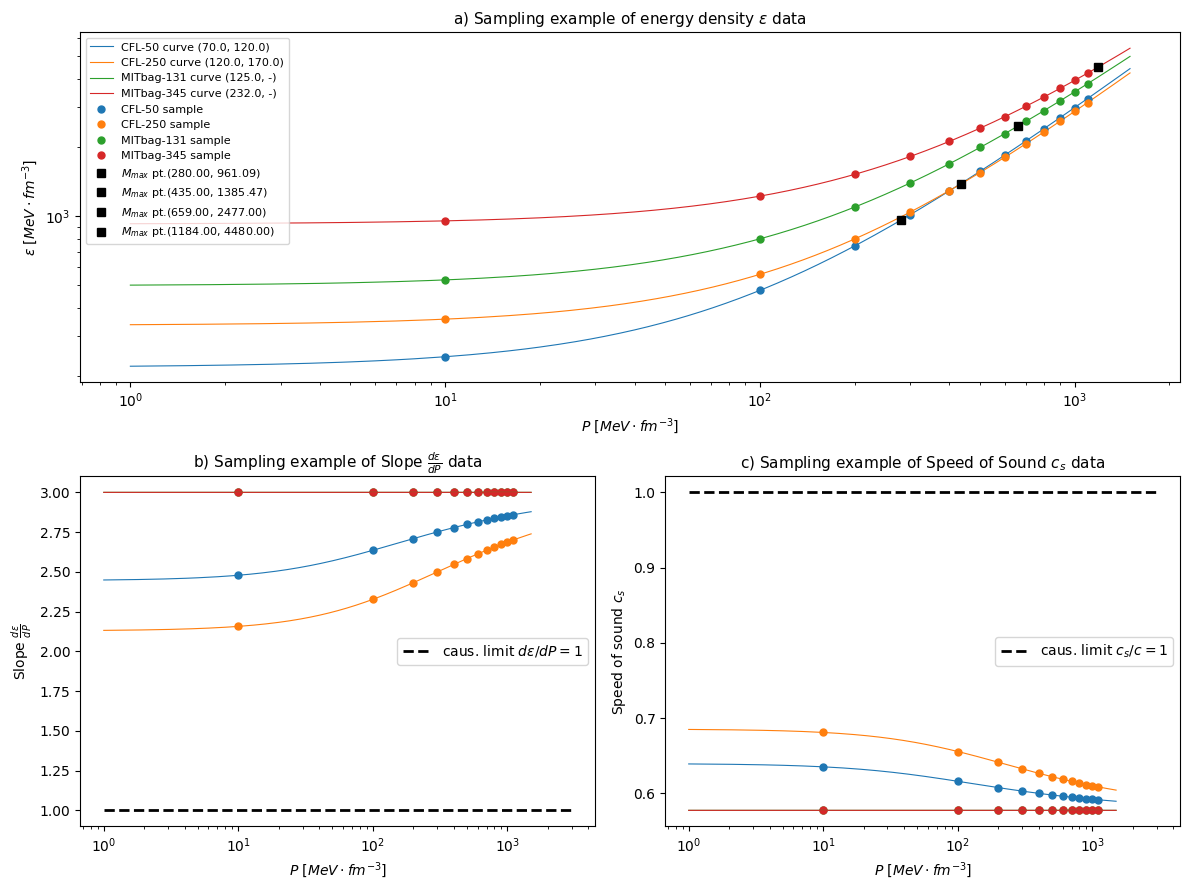

In [11]:
fig_sample_EOS_QS, axes_sample_EOS_QS = plt.subplots(figsize=(12,9))
axis_sample_energy_QS = plt.subplot2grid((2,2),(0,0),colspan=2)
axis_sample_slope_QS = plt.subplot2grid((2,2),(1,0))
axis_sample_cs_QS = plt.subplot2grid((2,2),(1,1))



# Pressure points, on which the values of Slope (dE_dP) and Energy density will be collected
pressure_points = [10,100,200,300,400,500,600,700,800,900,1000,1100]

# Sampling Slope (dE_dP) and Energy density data without observational noise (1 sample per EOS curve)
slope_sample_CFL_50,energy_sample_CFL_50,Pc_Mmax_CFL_50,Ec_Mmax_CFL_50 = QSdata().sample_EOS("CFL-50_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_CFL_250,energy_sample_CFL_250,Pc_Mmax_CFL_250,Ec_Mmax_CFL_250= QSdata().sample_EOS("CFL-250_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_MITbag_131,energy_sample_MITbag_131,Pc_Mmax_MITbag_131,Ec_Mmax_MITbag_131 = QSdata().sample_EOS("MITbag-131_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)
slope_sample_MITbag_345,energy_sample_MITbag_345,Pc_Mmax_MITbag_345,Ec_Mmax_MITbag_345 = QSdata().sample_EOS("MITbag-345_sol.csv",Pc_points=pressure_points,violate_caus="both",noiseSl_mv=0,noiseSl_std=0,noiseEc_mv=0,noiseEc_std=0)

# Getting the values of Beff and Delta parameters
CFL50_data = pd.read_csv("CFL-50_sol.csv")
data_columns_CFL50 = CFL50_data.columns
Beff_column_CFL50 = data_columns_CFL50[-2]
Beff_CFL50 = float(Beff_column_CFL50[7:])
Delta_column_CFL50 = data_columns_CFL50[-1]
Delta_CFL50 = float(Delta_column_CFL50[6:])

CFL250_data = pd.read_csv("CFL-250_sol.csv")
data_columns_CFL250 = CFL250_data.columns
Beff_column_CFL250 = data_columns_CFL250[-2]
Beff_CFL250 = float(Beff_column_CFL250[7:])
Delta_column_CFL250 = data_columns_CFL250[-1]
Delta_CFL250 = float(Delta_column_CFL250[6:])

MITbag131_data = pd.read_csv("MItbag-131_sol.csv")
data_columns_MITbag131 = MITbag131_data.columns
Beff_column_MITbag131 = data_columns_MITbag131[-1]
Beff_MITbag131 = float(Beff_column_MITbag131[3:])

MITbag345_data = pd.read_csv("MItbag-345_sol.csv")
data_columns_MITbag345 = MITbag345_data.columns
Beff_column_MITbag345 = data_columns_MITbag345[-1]
Beff_MITbag345 = float(Beff_column_MITbag345[3:])

# Plotting the respective EOS 2D curves
QSdata().plot_EOS_curve("CFL-50_sol.csv",axis_sample_energy_QS,'#1f77b4',curve_label=f"CFL-50 curve ({Beff_CFL50}, {Delta_CFL50})")
QSdata().plot_EOS_curve("CFL-250_sol.csv",axis_sample_energy_QS,'#ff7f0e',curve_label=f"CFL-250 curve ({Beff_CFL250}, {Delta_CFL250})")
QSdata().plot_EOS_curve("MITbag-130_sol.csv",axis_sample_energy_QS,'#2ca02c',curve_label=f"MITbag-131 curve ({Beff_MITbag131}, -)")
QSdata().plot_EOS_curve("MITbag-344_sol.csv",axis_sample_energy_QS,'#d62728', curve_label=f"MITbag-345 curve ({Beff_MITbag345}, -)")

# Plotting the energy density sampling data
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_50,".",ms=10,color='#1f77b4',label=f"CFL-50 sample")
axis_sample_energy_QS.plot(pressure_points,energy_sample_CFL_250,".",ms=10,color='#ff7f0e',label=f"CFL-250 sample")
axis_sample_energy_QS.plot(pressure_points,energy_sample_MITbag_131,".",ms=10,color='#2ca02c',label=f"MITbag-131 sample")
axis_sample_energy_QS.plot(pressure_points,energy_sample_MITbag_345,".",ms=10,color='#d62728',label=f"MITbag-345 sample")

# Plotting the maximum mass points
axis_sample_energy_QS.plot(Pc_Mmax_CFL_50,Ec_Mmax_CFL_50,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_CFL_50:.2f}, {Ec_Mmax_CFL_50:.2f})")
axis_sample_energy_QS.plot(Pc_Mmax_CFL_250,Ec_Mmax_CFL_250,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_CFL_250:.2f}, {Ec_Mmax_CFL_250:.2f})")
axis_sample_energy_QS.plot(Pc_Mmax_MITbag_131,Ec_Mmax_MITbag_131,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_MITbag_131:.2f}, {Ec_Mmax_MITbag_131:.2f})")
axis_sample_energy_QS.plot(Pc_Mmax_MITbag_345,Ec_Mmax_MITbag_345,"s",color="black",ms=6,label=r"$M_{max}$ pt."+f"({Pc_Mmax_MITbag_345:.2f}, {Ec_Mmax_MITbag_345:.2f})")


# Adding labels, bounds and scale on axes and title for clarity
axis_sample_energy_QS.set_title(r"a) Sampling example of energy density $\epsilon$ data", fontsize=11)
axis_sample_energy_QS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_energy_QS.set_ylabel(r"$\epsilon$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_energy_QS.set_xscale("log")
axis_sample_energy_QS.set_yscale("log")
axis_sample_energy_QS.legend(fontsize=8)

# Plotting the Slope (dE_dP) sampling data
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_50,".",ms=10,color='#1f77b4')
axis_sample_slope_QS.plot(pressure_points,slope_sample_CFL_250,".",ms=10,color='#ff7f0e')
axis_sample_slope_QS.plot(pressure_points,slope_sample_MITbag_131,".",ms=10,color='#2ca02c')
axis_sample_slope_QS.plot(pressure_points,slope_sample_MITbag_345,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve Slope=dε/dP=1
axis_sample_slope_QS.plot([1,3000],[1,1],"--",lw=2,color="black",label=r"caus. limit $d\epsilon/dP=1$")

# Plotting the respective Slope (dE_dP) vs Pressure 2D curves
QSdata().plot_dEdP_curve("CFL-50_sol.csv",axis_sample_slope_QS,'#1f77b4')
QSdata().plot_dEdP_curve("CFL-250_sol.csv",axis_sample_slope_QS,'#ff7f0e')
QSdata().plot_dEdP_curve("MITbag-130_sol.csv",axis_sample_slope_QS,'#2ca02c')
QSdata().plot_dEdP_curve("MITbag-344_sol.csv",axis_sample_slope_QS,'#d62728')

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_slope_QS.set_title(r"b) Sampling example of Slope $\frac{d\epsilon}{dP}$ data", fontsize=11)
axis_sample_slope_QS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_slope_QS.set_ylabel(r"Slope $\frac{d\epsilon}{dP}$",fontsize=10)
axis_sample_slope_QS.set_xscale("log")
axis_sample_slope_QS.legend(fontsize=10)
#axis_sample_slope_QS.set_yscale("log")

# Getting the Speed of Sound (c_s) sampling data
cs_sample_CFL_50 = np.sqrt(1/np.array(slope_sample_CFL_50))
cs_sample_CFL_250 = np.sqrt(1/np.array(slope_sample_CFL_250))
cs_sample_MITbag_131 = np.sqrt(1/np.array(slope_sample_MITbag_131))
cs_sample_MITbag_345 = np.sqrt(1/np.array(slope_sample_MITbag_345))

# Plotting the Speed of Sound (c_s) sampling data
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_50,".",ms=10,color='#1f77b4')
axis_sample_cs_QS.plot(pressure_points,cs_sample_CFL_250,".",ms=10,color='#ff7f0e')
axis_sample_cs_QS.plot(pressure_points,cs_sample_MITbag_131,".",ms=10,color='#2ca02c')
axis_sample_cs_QS.plot(pressure_points,cs_sample_MITbag_345,".",ms=10,color='#d62728')

# Plotting the causality limit curve, i.e. the curve c_s/c = 1
axis_sample_cs_QS.plot([1,3000],[1,1],"--",lw=2,color="black",label=r"caus. limit $c_s/c=1$")

# Plotting the respective Speed of Sound vs Pressure 2D curves
QSdata().plot_cs_curve("CFL-50_sol.csv",axis_sample_cs_QS,'#1f77b4')
QSdata().plot_cs_curve("CFL-250_sol.csv",axis_sample_cs_QS,'#ff7f0e')
QSdata().plot_cs_curve("MITbag-130_sol.csv",axis_sample_cs_QS,'#2ca02c')
QSdata().plot_cs_curve("MITbag-344_sol.csv",axis_sample_cs_QS,'#d62728')

# Adding labels, bounds and scale on axes and title for clarity
axis_sample_cs_QS.set_title(r"c) Sampling example of Speed of Sound $c_s$ data", fontsize=11)
axis_sample_cs_QS.set_xlabel(r"$P$ $[MeV\cdot fm^{-3}]$",fontsize=10)
axis_sample_cs_QS.set_ylabel(r"Speed of sound $c_s$",fontsize=10)
axis_sample_cs_QS.set_xscale("log")
axis_sample_cs_QS.legend(fontsize=10)
#axis_sample_cs_QS.set_yscale("log")


# Removing the frame and the ticks of the total figure
axes_sample_EOS_QS.spines['top'].set_visible(False)
axes_sample_EOS_QS.spines['right'].set_visible(False)
axes_sample_EOS_QS.spines['bottom'].set_visible(False)
axes_sample_EOS_QS.spines['left'].set_visible(False)
axes_sample_EOS_QS.set_xticks([])
axes_sample_EOS_QS.set_yticks([])

fig_sample_EOS_QS.tight_layout()
fig_sample_EOS_QS.savefig("sample_EOS_QS.pdf",dpi=300)

#### **2.2 Sampling and plotting  Mass and Radius data, along with their respective $M-R$ curves**

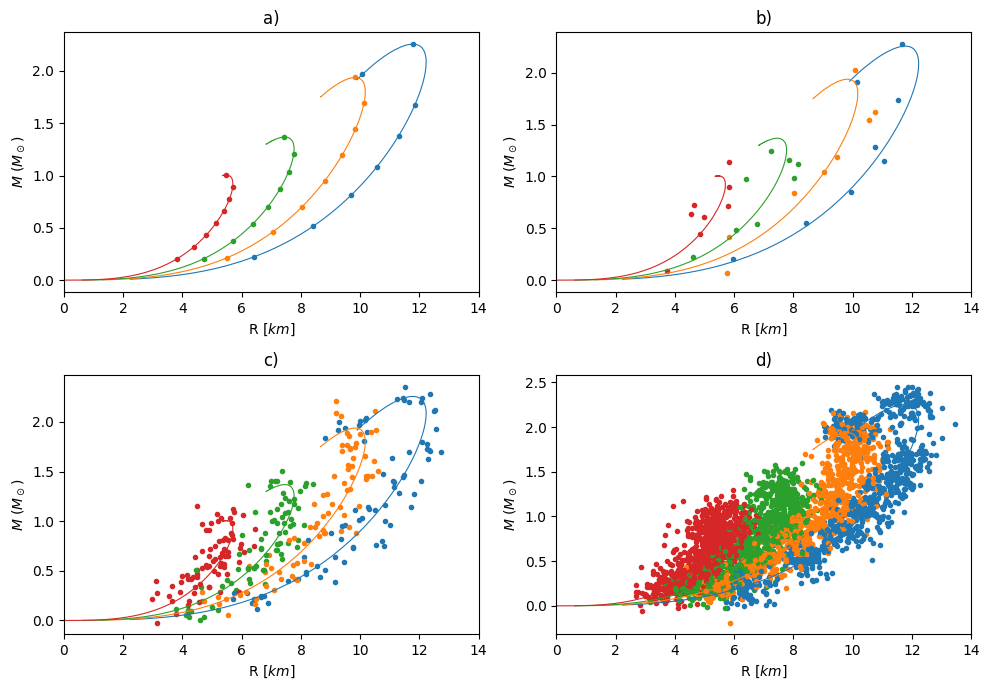

In [12]:
# Defining the figure and the axes
fig_sample_MR_QS,axes_sample_MR_QS = plt.subplots(2,2,figsize=(10,7))
points_mr = 8

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1,radius_sample_CFL_50_1 = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_CFL_250_1,radius_sample_CFL_250_1 = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_MITbag_131_1,radius_sample_MITbag_131_1 = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_MITbag_345_1,radius_sample_MITbag_345_1 = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_50_1,mass_sample_CFL_50_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_250_1,mass_sample_CFL_250_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_MITbag_131_1,mass_sample_MITbag_131_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_MITbag_345_1,mass_sample_MITbag_345_1,".")

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,0],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,0],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[0,0],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[0,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_QS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1n,radius_sample_CFL_50_1n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_CFL_250_1n,radius_sample_CFL_250_1n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_MITbag_131_1n,radius_sample_MITbag_131_1n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_MITbag_345_1n,radius_sample_MITbag_345_1n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_50_1n,mass_sample_CFL_50_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_250_1n,mass_sample_CFL_250_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_MITbag_131_1n,mass_sample_MITbag_131_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_MITbag_345_1n,mass_sample_MITbag_345_1n,".")

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,1],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,1],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[0,1],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[0,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_QS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,1].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_CFL_50_10n,radius_sample_CFL_50_10n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_10n,radius_sample_CFL_250_10n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_131_10n,radius_sample_MITbag_131_10n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_345_10n,radius_sample_MITbag_345_10n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_50_10n,mass_sample_CFL_50_10n,".",color='#1f77b4')
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_250_10n,mass_sample_CFL_250_10n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,0].plot(radius_sample_MITbag_131_10n,mass_sample_MITbag_131_10n,".",color='#2ca02c')
    axes_sample_MR_QS[1,0].plot(radius_sample_MITbag_345_10n,mass_sample_MITbag_345_10n,".",color='#d62728')

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,0],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,0],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[1,0],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[1,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_QS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_CFL_50_100n,radius_sample_CFL_50_100n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_100n,radius_sample_CFL_250_100n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_131_100n,radius_sample_MITbag_131_100n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_345_100n,radius_sample_MITbag_345_100n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)


    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_50_100n,mass_sample_CFL_50_100n,".",color='#1f77b4')
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_250_100n,mass_sample_CFL_250_100n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,1].plot(radius_sample_MITbag_131_100n,mass_sample_MITbag_131_100n,".",color='#2ca02c')
    axes_sample_MR_QS[1,1].plot(radius_sample_MITbag_345_100n,mass_sample_MITbag_345_100n,".",color='#d62728')

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,1],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,1],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[1,1],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[1,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_QS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,1].set_xbound([0,14])

fig_sample_MR_QS.tight_layout()
fig_sample_MR_QS.savefig("sample_MR_8pts_QS.pdf",dpi=300)

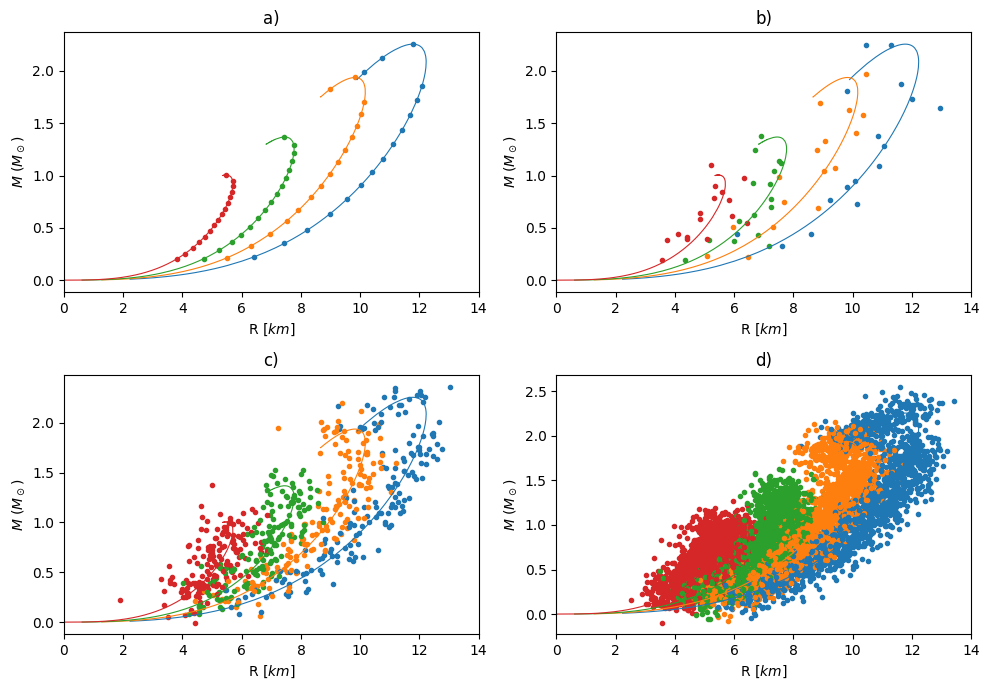

In [13]:
# Defining the figure and the axes
fig_sample_MR_QS,axes_sample_MR_QS = plt.subplots(2,2,figsize=(10,7))
points_mr = 16

# Sampling Mass and Radius data without observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1,radius_sample_CFL_50_1 = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_CFL_250_1,radius_sample_CFL_250_1 = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_MITbag_131_1,radius_sample_MITbag_131_1 = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)
mass_sample_MITbag_345_1,radius_sample_MITbag_345_1 = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0,noiseR_std=0)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_50_1,mass_sample_CFL_50_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_CFL_250_1,mass_sample_CFL_250_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_MITbag_131_1,mass_sample_MITbag_131_1,".")
axes_sample_MR_QS[0,0].plot(radius_sample_MITbag_345_1,mass_sample_MITbag_345_1,".")

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,0],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,0],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[0,0],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[0,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,0].set_title("a)",fontsize=12)
axes_sample_MR_QS[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (1 sample per M-R curve)
mass_sample_CFL_50_1n,radius_sample_CFL_50_1n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_CFL_250_1n,radius_sample_CFL_250_1n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_MITbag_131_1n,radius_sample_MITbag_131_1n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
mass_sample_MITbag_345_1n,radius_sample_MITbag_345_1n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Plotting these sampling data without observational noise
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_50_1n,mass_sample_CFL_50_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_CFL_250_1n,mass_sample_CFL_250_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_MITbag_131_1n,mass_sample_MITbag_131_1n,".")
axes_sample_MR_QS[0,1].plot(radius_sample_MITbag_345_1n,mass_sample_MITbag_345_1n,".")

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[0,1],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[0,1],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[0,1],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[0,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[0,1].set_title("b)",fontsize=12)
axes_sample_MR_QS[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[0,1].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (10 samples per M-R curve)
for i in range(0,10):
    mass_sample_CFL_50_10n,radius_sample_CFL_50_10n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_10n,radius_sample_CFL_250_10n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_131_10n,radius_sample_MITbag_131_10n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_345_10n,radius_sample_MITbag_345_10n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_50_10n,mass_sample_CFL_50_10n,".",color='#1f77b4')
    axes_sample_MR_QS[1,0].plot(radius_sample_CFL_250_10n,mass_sample_CFL_250_10n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,0].plot(radius_sample_MITbag_131_10n,mass_sample_MITbag_131_10n,".",color='#2ca02c')
    axes_sample_MR_QS[1,0].plot(radius_sample_MITbag_345_10n,mass_sample_MITbag_345_10n,".",color='#d62728')

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,0],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,0],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[1,0],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[1,0],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,0].set_title("c)",fontsize=12)
axes_sample_MR_QS[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,0].set_xbound([0,14])



# Sampling Mass and Radius data with observational noise (100 samples per M-R curve)
for i in range(0,100):
    mass_sample_CFL_50_100n,radius_sample_CFL_50_100n = QSdata().sample_MR("CFL-50_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_CFL_250_100n,radius_sample_CFL_250_100n = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_131_100n,radius_sample_MITbag_131_100n = QSdata().sample_MR("MITbag-131_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)
    mass_sample_MITbag_345_100n,radius_sample_MITbag_345_100n = QSdata().sample_MR("MITbag-345_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)


    # Plotting these sampling data without observational noise
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_50_100n,mass_sample_CFL_50_100n,".",color='#1f77b4')
    axes_sample_MR_QS[1,1].plot(radius_sample_CFL_250_100n,mass_sample_CFL_250_100n,".",color='#ff7f0e')
    axes_sample_MR_QS[1,1].plot(radius_sample_MITbag_131_100n,mass_sample_MITbag_131_100n,".",color='#2ca02c')
    axes_sample_MR_QS[1,1].plot(radius_sample_MITbag_345_100n,mass_sample_MITbag_345_100n,".",color='#d62728')

# Plotting the respective M-R curves
QSdata().plot_MR_curve("CFL-50_sol.csv",axes_sample_MR_QS[1,1],'#1f77b4',"grey")
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_sample_MR_QS[1,1],'#ff7f0e',"grey")
QSdata().plot_MR_curve("MITbag-131_sol.csv",axes_sample_MR_QS[1,1],'#2ca02c',"grey")
QSdata().plot_MR_curve("MITbag-345_sol.csv",axes_sample_MR_QS[1,1],'#d62728',"grey")

# Adding labels, bounds on axes and title for clarity
axes_sample_MR_QS[1,1].set_title("d)",fontsize=12)
axes_sample_MR_QS[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_sample_MR_QS[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_sample_MR_QS[1,1].set_xbound([0,14])

fig_sample_MR_QS.tight_layout()
fig_sample_MR_QS.savefig("sample_MR_16pts_QS.pdf",dpi=300)

#### **2.3 Generating and saving data for regression purposes**

In [4]:
# Pressure points, on which the values of Slope (dP_dE) and Energy density will be collected
pressure_points = [10,100,200,300,400,500,600,700,800,900,1000,1100]
points_mr = 8

# 1 sample per EOS, without observational noise
filesave = "QS_reg_data_pp8mr8s1" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],idx_max_cfl=510,idx_max_mitbag=381,noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr8s10" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],idx_max_cfl=510,idx_max_mitbag=381,noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr8s100" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,noises_mv=[0,0,0,0],idx_max_cfl=510,idx_max_mitbag=381,noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "QS_reg_data_pp8mr8s1.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr8s10.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr8s100.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr8s100_rwshuffled.csv" file has also been completed !!!




In [5]:
# Pressure points, on which the values of Slope (dP_dE) and Energy density will be collected
pressure_points = [10,100,200,300,400,500,600,700,800,900,1000,1100]
points_mr = 16

# 1 sample per EOS, without observational noise
filesave = "QS_reg_data_pp8mr16s1" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=1,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,idx_max_cfl=510,idx_max_mitbag=381,noises_mv=[0,0,0,0],noises_std=[0,0,0,0])

# 10 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr16s10" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=10,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,idx_max_cfl=510,idx_max_mitbag=381,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

# 100 samples per EOS, with observational noise for Mass and Radius data
filesave = "QS_reg_data_pp8mr16s100" # name of the .csv, where the regression data will be recorded
QSdata().gen_reg_data(filesave,samples_per_EOS=100,M_threshold=0.2,points_MR=points_mr,Pc_points=pressure_points,idx_max_cfl=510,idx_max_mitbag=381,noises_mv=[0,0,0,0],noises_std=[0.1,0.5,0,0])

>The recording process of regression data on the "QS_reg_data_pp8mr16s1.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr16s1_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr16s10.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr16s10_rwshuffled.csv" file has also been completed !!!


>The recording process of regression data on the "QS_reg_data_pp8mr16s100.csv" file has been completed !!!
>>The recording process of rowwise shuffled regression data on the "QS_reg_data_pp8mr16s100_rwshuffled.csv" file has also been completed !!!




### **3. Shuffling $M-R$ data**

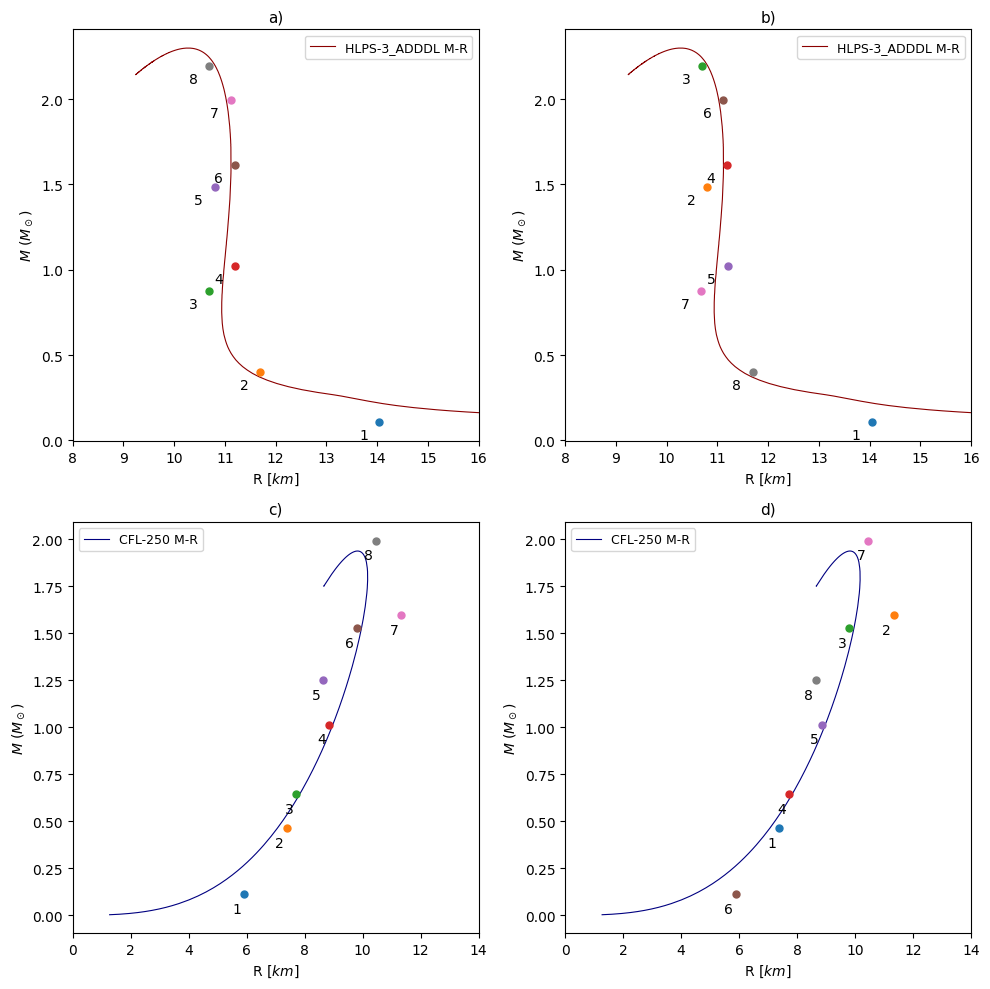

In [8]:
fig_shuffle_MR, axes_shuffle_MR = plt.subplots(2,2, figsize=(10,10))
points_mr = 8

# Sampling M-R data of the HLPS-3_ADDDL EoS
mass_sample_HLPS3_ADDDL,radius_sample_HLPS3_ADDDL = polyNSdata().sample_MR("HLPS-3_ADDDL_sol.csv",850,0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Initialzing the position index values
idx_vals = np.arange(0,len(mass_sample_HLPS3_ADDDL))

# PLotting the M-R curve of the HLPS-3_ADDDL EoS 
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_shuffle_MR[0,0],EOS_type="polytropic",clr_caus="darkred",curve_label="HLPS-3_ADDDL M-R",Pc_threshold=850)

# Plotting the sampled M-R points without shuffling in the same graph
point_num = 1
for idx in idx_vals:
    axes_shuffle_MR[0,0].plot(radius_sample_HLPS3_ADDDL[idx],mass_sample_HLPS3_ADDDL[idx],".",ms=10)
    axes_shuffle_MR[0,0].text(radius_sample_HLPS3_ADDDL[idx]-0.4,mass_sample_HLPS3_ADDDL[idx]-0.1,f"{point_num}")
    point_num +=1 

axes_shuffle_MR[0,0].set_title("a)",fontsize=11)
axes_shuffle_MR[0,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_shuffle_MR[0,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_shuffle_MR[0,0].set_xbound([8,16])
axes_shuffle_MR[0,0].legend(fontsize=9)

# Shuffling the position index values
np.random.shuffle(idx_vals)

# PLotting the M-R curve of the HLPS-3_ADDDL EoS 
polyNSdata().plot_MR_curve("HLPS-3_ADDDL_sol.csv",axes_shuffle_MR[0,1],EOS_type="polytropic",clr_caus="darkred",curve_label="HLPS-3_ADDDL M-R",Pc_threshold=850)

print("\n")
# Plotting the sampled M-R points with shuffling in the same graph
point_num = 1
for idx in idx_vals:
    axes_shuffle_MR[0,1].plot(radius_sample_HLPS3_ADDDL[idx],mass_sample_HLPS3_ADDDL[idx],".",ms=10)
    axes_shuffle_MR[0,1].text(radius_sample_HLPS3_ADDDL[idx]-0.4,mass_sample_HLPS3_ADDDL[idx]-0.1,f"{point_num}")
    point_num +=1 

axes_shuffle_MR[0,1].set_title("b)",fontsize=11)
axes_shuffle_MR[0,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_shuffle_MR[0,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_shuffle_MR[0,1].set_xbound([8,16])
axes_shuffle_MR[0,1].legend(fontsize=9)

# Sampling M-R data of the CFL-250 EoS
mass_sample_CFL_250,radius_sample_CFL_250 = QSdata().sample_MR("CFL-250_sol.csv",0.2,points_mr,noiseM_std=0.1,noiseR_std=0.5)

# Initialzing the position index values
idx_vals = np.arange(0,len(mass_sample_CFL_250))

# PLotting the M-R curve of the CFL-250 EoS 
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_shuffle_MR[1,0],clr_caus="navy",curve_label="CFL-250 M-R")

# Plotting the sampled M-R points without shuffling in the same graph
point_num = 1
for idx in idx_vals:
    axes_shuffle_MR[1,0].plot(radius_sample_CFL_250[idx],mass_sample_CFL_250[idx],".",ms=10)
    axes_shuffle_MR[1,0].text(radius_sample_CFL_250[idx]-0.4,mass_sample_CFL_250[idx]-0.1,f"{point_num}")
    point_num +=1 

axes_shuffle_MR[1,0].set_title("c)",fontsize=11)
axes_shuffle_MR[1,0].set_xlabel(r"R $[km]$",fontsize=10)
axes_shuffle_MR[1,0].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_shuffle_MR[1,0].set_xbound([0,14])
axes_shuffle_MR[1,0].legend(fontsize=9)

# Shuffling the position index values
np.random.shuffle(idx_vals)

# PLotting the M-R curve of the CFL-250 EoS 
QSdata().plot_MR_curve("CFL-250_sol.csv",axes_shuffle_MR[1,1],clr_caus="navy",curve_label="CFL-250 M-R")

# Plotting the sampled M-R points without shuffling in the same graph
point_num = 1
for idx in idx_vals:
    axes_shuffle_MR[1,1].plot(radius_sample_CFL_250[idx],mass_sample_CFL_250[idx],".",ms=10)
    axes_shuffle_MR[1,1].text(radius_sample_CFL_250[idx]-0.4,mass_sample_CFL_250[idx]-0.1,f"{point_num}")
    point_num +=1 

axes_shuffle_MR[1,1].set_title("d)",fontsize=11)
axes_shuffle_MR[1,1].set_xlabel(r"R $[km]$",fontsize=10)
axes_shuffle_MR[1,1].set_ylabel(r"$M$ $(M_\odot)$",fontsize=10)
axes_shuffle_MR[1,1].set_xbound([0,14])
axes_shuffle_MR[1,1].legend(fontsize=9)

fig_shuffle_MR.tight_layout()
fig_shuffle_MR.savefig("shuffle_MR.pdf",dpi=300)